In [2]:
from tensorflow import keras
keras.__version__

'2.4.0'

# Un premier regard sur un réseau de neurones

- Premier exemple concret de réseau de neurones, qui utilise le package Python Keras pour apprendre à classer chiffres écrits à la main. 


- Le problème que nous essayons de résoudre ici est de classer les images en niveaux de gris de chiffres manuscrits (28 pixels sur 28 pixels) dans leur 10 catégories (0 à 9). 


- Le jeu de données que nous allons utiliser est le MNIST, un jeu de données classique de la communauté d’apprentissage automatique, qui a été presque aussi longtemps que le champ lui-même et a été très intensément étudié. C'est un ensemble de 60 000 images d'apprentissage, plus 10 000 de tests

In [3]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

1


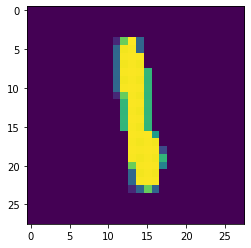

In [4]:
import matplotlib.pyplot as plt
plt.imshow(train_images[200])
print(train_labels[200])

Etudions les données d'apprentissage :

In [5]:
train_images.shape
test_labels2 = test_labels.copy()

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Notre flux de travail sera le suivant: d’abord, nous présenterons à notre réseau de neurones les données d’entraînement, `train_images` et` train_labels`.


Le réseau apprendra ensuite à associer des images et des étiquettes. Enfin, nous demanderons au réseau de produire des prédictions pour `test_images`, et nous vérifierons si ces prédictions correspondent aux étiquettes de `test_labels`.

In [8]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation ='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

In [9]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


Ici, notre réseau consiste en une séquence de deux couches `Dense`, qui sont des couches densément connectées.


La deuxième (et dernière) couche est une couche "softmax", ce qui signifie qu’elle renverra un tableau de 10 scores de probabilité


Nous devons choisir trois éléments supplémentaires dans le cadre de l’étape "compilation":

- Une fonction de perte: voici comment le réseau sera capable de mesurer la qualité de son travail sur ses données de formation, et donc comment il le sera capable de se diriger dans la bonne direction.
-  Un optimiseur: c'est le mécanisme par lequel le réseau se mettra à jour en fonction des données qu'il voit et de sa fonction de perte.
- Mesures : pendant la formation et les tests. Ici, nous ne nous intéresserons qu'à la précision (la fraction des images qui ont été correctement classifié).

In [10]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Avant l'apprentissage, nous allons prétraiter nos données en les transformant dans la forme attendue par le réseau et en les redimensionnant de manière à ce que toutes les valeurs soient en mémoire.


Nos images étaient stockées dans un tableau de formes `(60000, 28, 28)` de type `uint8` avec des valeurs dans l'intervalle `[0, 255]`. Nous le transformons en un `tableau float32` de forme` (60000, 28 * 28) `avec des valeurs comprises entre 0 et 1.

In [11]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255


Nous devons également coder les étiquettes de manière catégorielle : 

In [12]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [14]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

Nous sommes maintenant prêts à apprendre notre réseau via un appel à la méthode `fit` du réseau :

In [15]:
history = network.fit(train_images, train_labels, epochs=50, batch_size=128, validation_data=((test_images,test_labels)))

Epoch 1/50
469/469 [==============================] - 2s 5ms/step - loss: 0.2248 - accuracy: 0.9311 - val_loss: 0.1026 - val_accuracy: 0.9680
Epoch 2/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0820 - accuracy: 0.9749 - val_loss: 0.0817 - val_accuracy: 0.9752
Epoch 3/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0547 - accuracy: 0.9832 - val_loss: 0.0934 - val_accuracy: 0.9740
Epoch 4/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0377 - accuracy: 0.9882 - val_loss: 0.0722 - val_accuracy: 0.9802
Epoch 5/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0295 - accuracy: 0.9909 - val_loss: 0.0779 - val_accuracy: 0.9810
Epoch 6/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0238 - accuracy: 0.9924 - val_loss: 0.0778 - val_accuracy: 0.9802
Epoch 7/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0172 - accuracy: 0.9947 - val_loss: 0.0891 - val_accuracy: 0.9819
Epoch 

Deux quantités sont affichées pendant l’apprentissage : la "perte" du réseau sur les données d’apprentissage et la précision du réseau sur les données d'entraînement.

Nous atteignons rapidement une précision de 0,989 (soit 98,9%) sur les données d’apprentissage. Vérifions maintenant que notre modèle fonctionne bien sur le jeu de tests:

In [16]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 2ms/step - loss: 0.2451 - accuracy: 0.9842


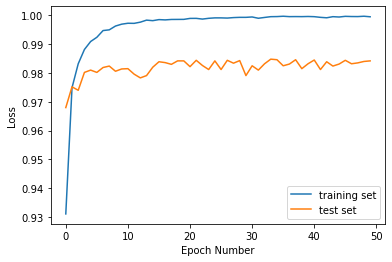

In [21]:
import matplotlib.pyplot as plt

plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(history.history['accuracy'], label='training set')
plt.plot(history.history['val_accuracy'], label='test set')
plt.legend()

In [11]:
print('test_acc:', test_acc)

test_acc: 0.9782


In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
confusion_matrix(test_labels2,network.predict_classes(test_images))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[ 970,    1,    1,    0,    1,    0,    4,    0,    2,    1],
       [   0, 1128,    2,    0,    0,    0,    1,    0,    4,    0],
       [   1,    0, 1014,    2,    2,    0,    4,    3,    5,    1],
       [   1,    0,    3,  987,    0,    8,    0,    4,    3,    4],
       [   0,    0,    3,    0,  968,    0,    5,    1,    0,    5],
       [   2,    0,    0,    5,    1,  879,    2,    0,    3,    0],
       [   2,    2,    0,    1,    3,    1,  946,    0,    3,    0],
       [   0,    3,    6,    1,    0,    0,    0, 1009,    5,    4],
       [   1,    1,    2,    1,    1,    1,    1,    2,  960,    4],
       [   2,    3,    0,    0,    9,    5,    0,    3,    6,  981]])